In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean.cm as cmo
import cartopy.crs as ccrs
import gsw

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


from utils import *

In [2]:
ds = load_climatology_with_deptho()
ds

<xarray.Dataset>
Dimensions:    (month: 12, depth: 39, latitude: 121, longitude: 1440)
Coordinates:
  * depth      (depth) float32 0.5058 1.556 2.668 3.856 ... 370.7 411.8 457.6
  * latitude   (latitude) float32 60.0 60.25 60.5 60.75 ... 89.5 89.75 90.0
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    S          (month, depth, latitude, longitude) float32 32.93 32.91 ... 34.88
    T          (month, depth, latitude, longitude) float32 2.22 2.256 ... 0.6027
    SIC        (month, latitude, longitude) float32 0.0008339 ... 0.982
    SIT        (month, latitude, longitude) float32 0.002912 0.002652 ... 1.954
    U          (month, depth, latitude, longitude) float32 -0.04629 ... 0.000...
    V          (month, depth, latitude, longitude) float32 0.06839 ... 0.000531
    SSH        (month, latitude, longitude) float32 -0.08223 ... -0.5848
    deptho     (latitude, longitude) float64 2.502e+03 2.01e+03 ... nan nan
Attributes:
    history:      Creation 2023-October-31 12:55:11 GMT+0200
    source:       Copernicus Marine Service
    title:        Monthly mean fields for product GLOBAL_MULTIYEAR_PHY_ENS_00...
    references:   http://marine.copernicus.eu
    Conventions:  CF-1.6
    institution:  Mercator Ocean
    credit:       E.U. Copernicus Marine Service Information (CMEMS)
    producer:     CMEMS - Global Monitoring and Forecasting Centre
    contact:      servicedesk.cmems@mercator-ocean.eu

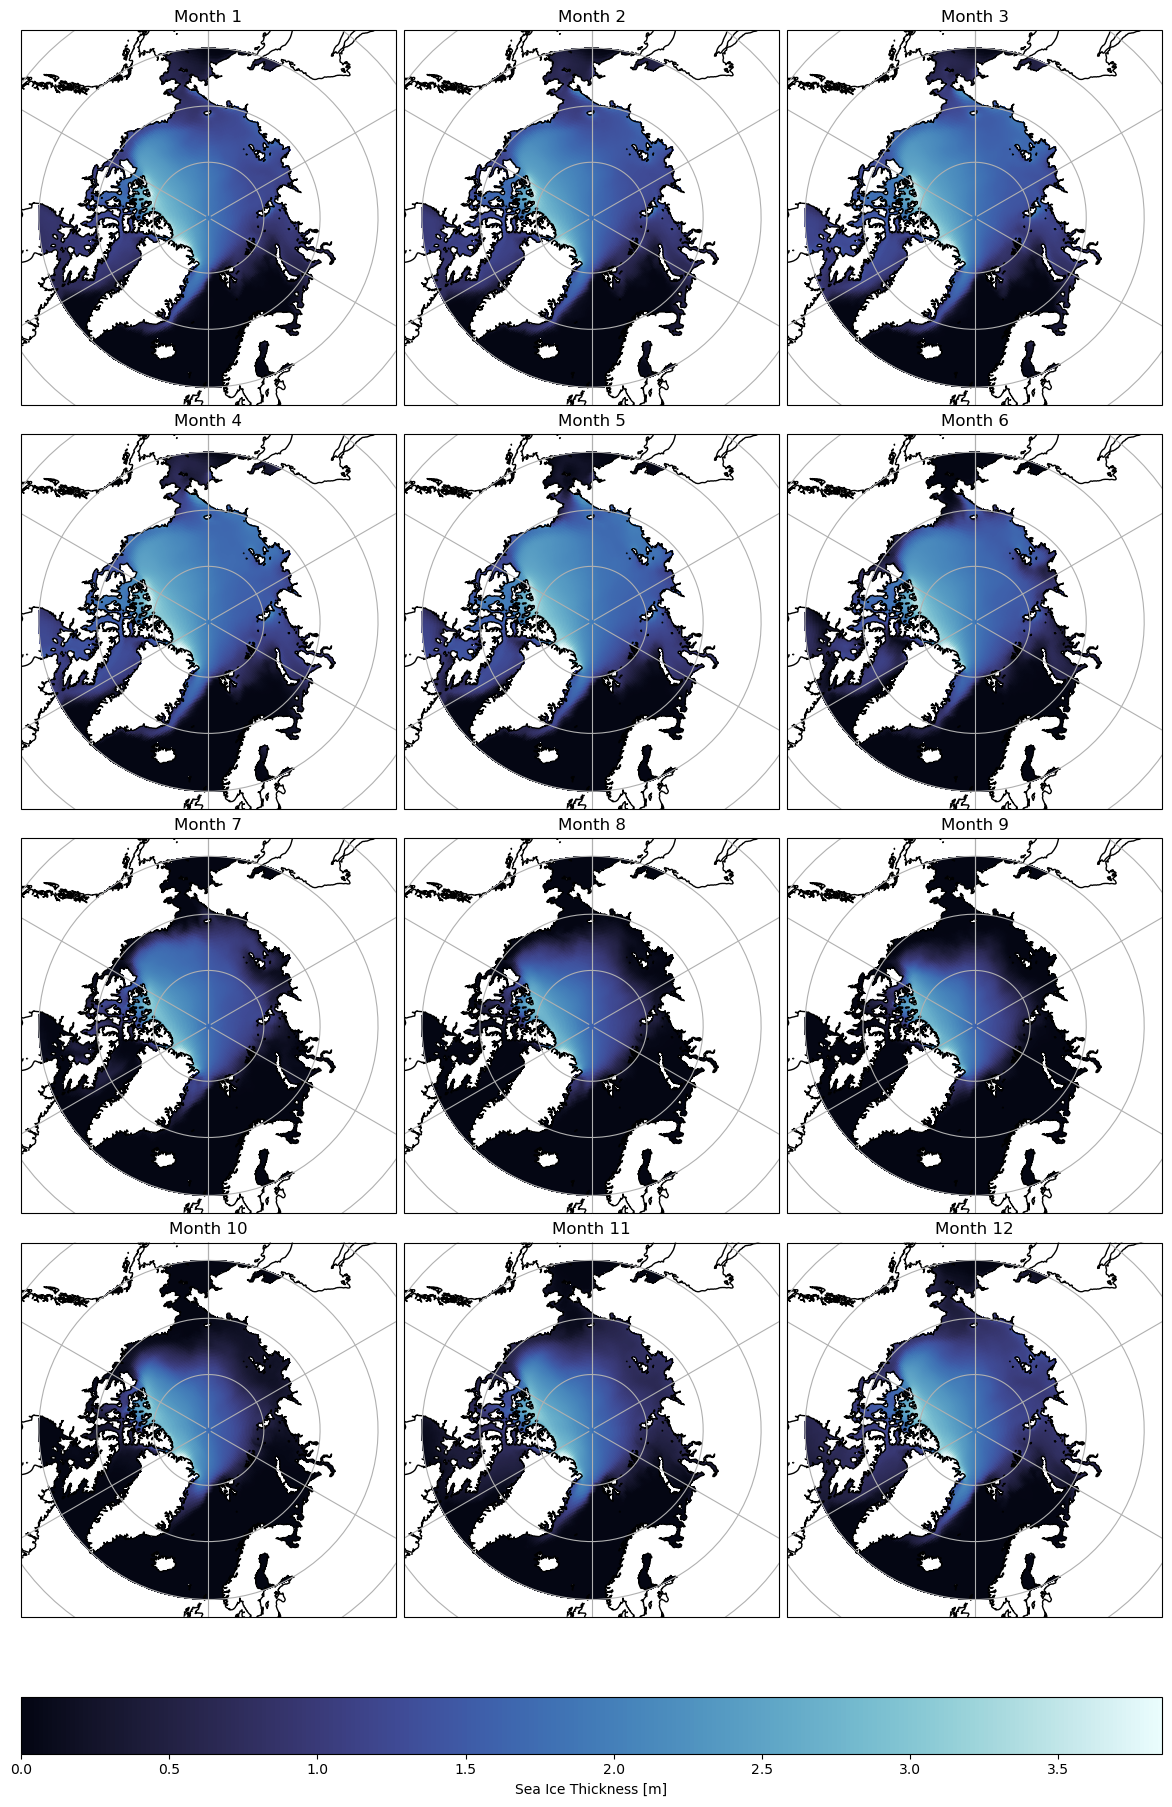

In [6]:
fig, axs = plt.subplots(4, 3, subplot_kw={'projection': ccrs.NorthPolarStereo()}, figsize=(12, 18), layout='compressed')
for i, ax in enumerate(axs.flat):
    month = i + 1
    sub_ds = ds[['SIC', 'SIT']].sel(month=month)
    ax = axs.flat[i]
    pc = ax.pcolormesh(sub_ds['longitude'], sub_ds['latitude'], sub_ds['SIT'], transform=ccrs.PlateCarree(), cmap=cmo.ice)
    ax.set_title(f'Month {month}')
    ax.coastlines()
    ax.gridlines()
fig.colorbar(pc, ax=axs, orientation='horizontal', label='Sea Ice Thickness [m]')
plt.show()
